<a href="https://colab.research.google.com/github/melon2560/python-projects/blob/main/20241118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

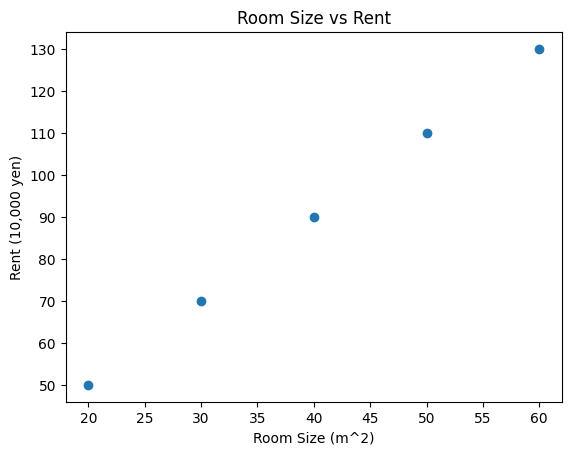

In [ ]:
#線形回帰の基本式: y = ax + b
#a: 傾き, b: 切片

import numpy as np
import matplotlib.pyplot as plt

#シンプルなデータセット(例: 広さと家賃)
x = np.array([20, 30, 40, 50, 60])  #部屋の広さ(平方メートル)
y = np.array([50, 70, 90, 110, 130])  #家賃(万円)

#データの可視化
plt.scatter(x, y)
plt.xlabel('Room Size (m^2)')
plt.ylabel('Rent (10,000 yen)')
plt.title('Room Size vs Rent')
plt.show()

傾き（a）: [2.]
切片（b）: 10.0
35平方メートルの家賃予測: [80.]


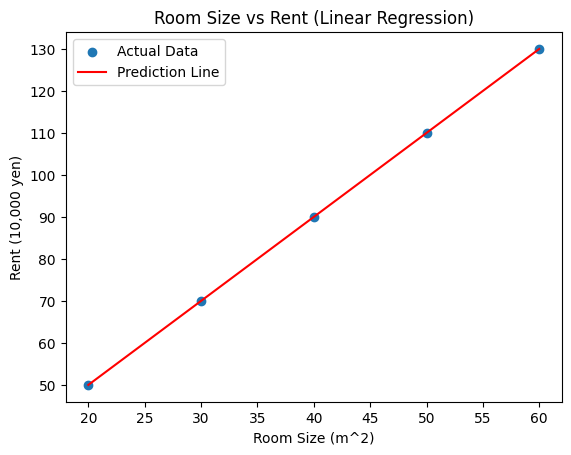

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# データセット
x = np.array([20, 30, 40, 50, 60]).reshape(-1, 1)  # 部屋の広さ（入力）
y = np.array([50, 70, 90, 110, 130])  # 家賃（出力）

# モデルの作成と学習
model = LinearRegression()
model.fit(x, y)

# 傾きと切片
print("傾き（a）:", model.coef_)
print("切片（b）:", model.intercept_)

# 予測
predicted = model.predict([[35]])  # 35平方メートルの部屋の家賃を予測
print("35平方メートルの家賃予測:", predicted)

# 結果を可視化
import matplotlib.pyplot as plt
plt.scatter(x, y, label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Prediction Line')
plt.legend()
plt.xlabel('Room Size (m^2)')
plt.ylabel('Rent (10,000 yen)')
plt.title('Room Size vs Rent (Linear Regression)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.7824427480916031
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       144
           1       0.82      0.66      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.79      0.78      0.78       262



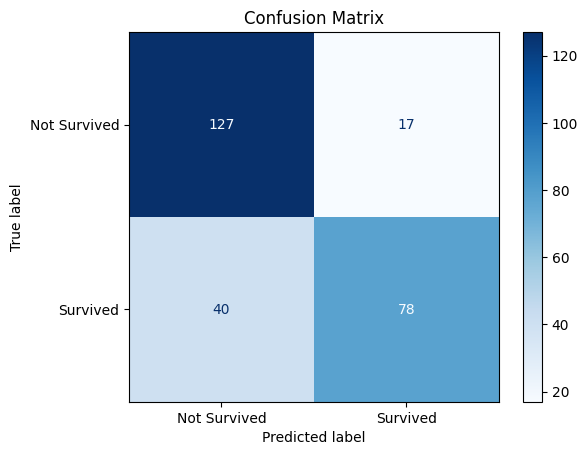

In [ ]:
# 必要なライブラリをインポート
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Titanicデータセットの読み込み
df = pd.read_csv("titanic3.csv")

# 欠損値処理
df['age'] = df['age'].fillna(df['age'].median())  # 年齢を中央値で埋める
df['fare'] = df['fare'].fillna(df['fare'].median())  # 運賃を中央値で埋める

# 特徴量の追加
df['family_size'] = df['sibsp'] + df['parch'] + 1  # 家族人数を作成
df['is_alone'] = (df['family_size'] == 1).astype(int)  # 一人かどうか
df['fare_pclass'] = df['fare'] * df['pclass']  # 運賃 × 客室クラス
df['family_category'] = pd.cut(df['family_size'], bins=[0, 1, 4, 10], labels=['Alone', 'Small Family', 'Large Family'])  # 家族カテゴリ
df['age_fare_interaction'] = df['age'] * df['fare']  # 年齢 × 運賃の相互作用

# 特徴量とターゲットの選択
X = df[['age', 'fare', 'family_size', 'is_alone', 'fare_pclass', 'family_category', 'age_fare_interaction', 'sex', 'pclass']]
X = pd.get_dummies(X, drop_first=True)  # ダミー変数化
y = df['survived']  # ターゲット: 生存/非生存

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの作成と学習
lr_model = LogisticRegression(max_iter=1000)  # 最大反復回数を増やす
lr_model.fit(X_train, y_train)

# テストデータで予測
y_pred_lr = lr_model.predict(X_test)

# 精度の評価
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

# 混同行列の作成と可視化
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


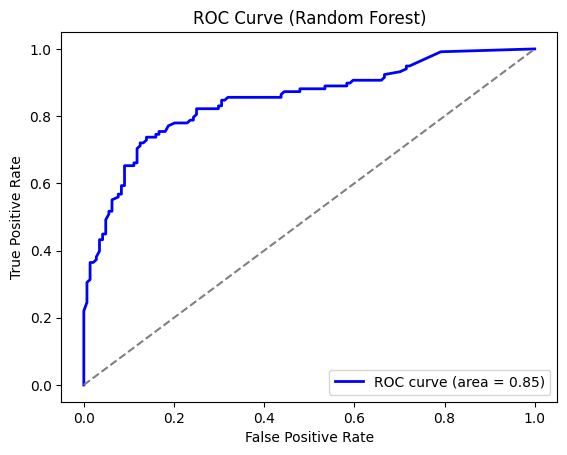

Accuracy (Random Forest): 0.7862595419847328
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       144
           1       0.84      0.65      0.73       118

    accuracy                           0.79       262
   macro avg       0.80      0.77      0.78       262
weighted avg       0.79      0.79      0.78       262



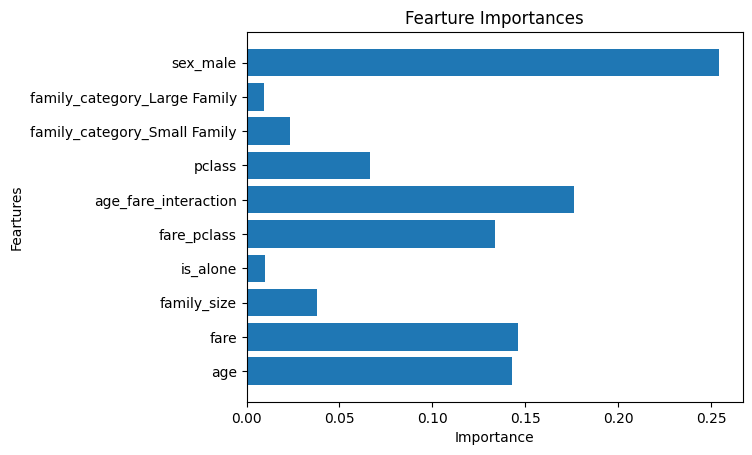

In [ ]:
# ランダムフォレスト
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# ランダムフォレストモデルの作成
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# テストデータで予測
y_pred_rf = rf_model.predict(X_test)

# ランダムフォレストの予測確立を取得
y_prod_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC曲線の作成
fpr, tpr, thresholds = roc_curve(y_test, y_prod_rf)
roc_auc = auc(fpr, tpr)

# ROC曲線をプロット
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # 対角線
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# 精度を確認
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# 特徴量の重要度を取得
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feartures = X.columns

# 可視化
plt.barh(feartures, importances)
plt.xlabel('Importance')
plt.ylabel('Feartures')
plt.title('Fearture Importances')
plt.show()

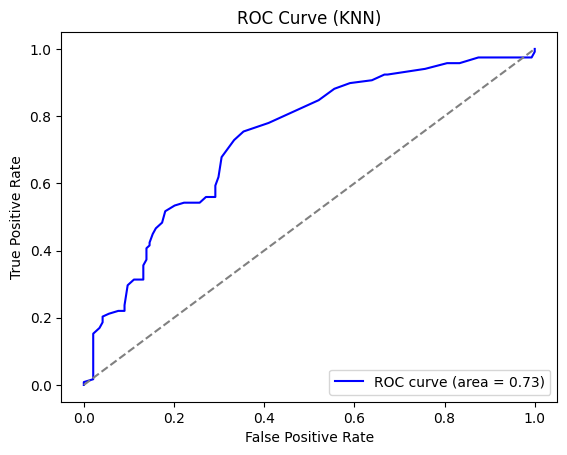

In [ ]:
# KNN

# 必要なライブラリのインポート
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_csv("titanic3.csv")

# 欠損値の処理
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# 特徴量の選択
X = df[['age', 'fare', 'sex', 'pclass']]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNNモデルの作成
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# テストデータで予測
y_pred = knn.predict(X_test)

# 精度の評価
y_prod = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prod)
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc='lower right')
plt.show()